# Project Title: YouTube Performance Prediction AI Engine

### Data Collection

In [ ]:
import yt_dlp
import pandas as pd

# ✅ Define 50 computer science topics
topics = [
    "Machine Learning", "Deep Learning", "Artificial Intelligence", "Data Science",
    "Computer Vision", "Natural Language Processing", "Big Data", "Cybersecurity",
    "Cloud Computing", "Software Engineering", "Python Programming", "JavaScript Development",
    "Blockchain Technology", "Data Structures and Algorithms", "Computer Networks",
    "Internet of Things (IoT)", "Edge Computing", "Quantum Computing",
    "Cryptography", "Computer Architecture", "Operating Systems",
    "Database Management Systems", "Web Development", "API Development",
    "Microservices Architecture", "Software Testing", "DevOps",
    "Computer Graphics", "Embedded Systems", "Parallel Computing",
    "Computer Vision in Healthcare", "AI in Finance", "Autonomous Vehicles",
    "Robotics and Automation", "Natural Language Understanding", "AI Ethics",
    "Big Data Analytics", "Augmented Reality", "Virtual Reality",
    "Cloud Security", "Cyber Threat Intelligence", "Neural Networks",
    "AI in Gaming", "Computer Simulation", "Speech Recognition",
    "AI in Healthcare", "Digital Signal Processing", "Explainable AI",
    "Predictive Analytics", "Software Project Management", "Compiler Design"
]

# ✅ Number of videos per topic
videos_per_topic = 10
video_data = []

# ✅ Extract video details using yt-dlp
def extract_video_details(query):
    ydl_opts = {
        'quiet': True,
        'extract_flat': False,  # Fetch full metadata, not just links
        'skip_download': True,
        'noplaylist': True,
        'force_generic_extractor': False,  # Ensures metadata extraction
    }
    
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        search_results = ydl.extract_info(f"ytsearch{videos_per_topic}:{query}", download=False)
        
        if 'entries' in search_results:
            for video in search_results['entries']:
                video_data.append({
                    "Title": video.get("title", "N/A"),
                    "Uploader": video.get("uploader", "N/A"),
                    "Views": video.get("view_count", 0),
                    "Likes": video.get("like_count", 0),
                    "Comments": video.get("comment_count", 0),
                    "Upload Date": video.get("upload_date", "N/A"),
                    "Duration (Seconds)": video.get("duration", 0),
                    "Duration (Minutes)": round(video.get("duration", 0) / 60, 2),
                    "Tags": ", ".join(video.get("tags", [])),
                    "URL": video.get("webpage_url", "N/A")
                })

# ✅ Scrape videos for each topic
for topic in topics:
    extract_video_details(topic)

# ✅ Convert to DataFrame and Save as CSV
df = pd.DataFrame(video_data)

# ✅ Save to CSV file
csv_filename = "youtube_computer_science_500_entries.csv"
df.to_csv(csv_filename, index=False)

print(f"✅ Data scraping complete! File saved as {csv_filename}")


### Data Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv("youtube_data.csv")

df.head(5)

,Title,Uploader,Views,Likes,Comments,Upload Date,Duration (Seconds),Duration (Minutes),Tags,URL
0,Machine Learning for Everybody – Full Course,freeCodeCamp.org,8397276,83764,1800,26-09-2022,14033,233.88,NaN,https://www.youtube.com/watch?v=i_LwzRVP7bg
1,Complete Machine Learning In 6 Hours| Krish Naik,Krish Naik,1124367,19654,466,28-05-2022,23872,397.87,"yt:cc=on, complete machine learning algorithms...",https://www.youtube.com/watch?v=JxgmHe2NyeY
2,Machine Learning Full Course - Learn Machine L...,edureka!,3336201,59006,1300,22-09-2019,34712,578.53,"yt:cc=on, Machine Learning Full Course, machin...",https://www.youtube.com/watch?v=GwIo3gDZCVQ
3,All Machine Learning algorithms explained in 1...,Infinite Codes,661710,29703,242,17-09-2024,989,16.48,"machine learning algorithms, machine learning,...",https://www.youtube.com/watch?v=E0Hmnixke2g
4,Complete ML Machine Learning in one shot | Sem...,KnowledgeGATE by Sanchit Sir,313207,5279,598,09-06-2024,25555,425.92,"knowledgegate, knowledge gate, knowledge gate ...",https://www.youtube.com/watch?v=2oGsCHlfBUg


In [2]:
print(df.isnull().sum())

Title                  0
Uploader               0
Views                  0
Likes                  0
Comments               0
Upload Date            0
Duration (Seconds)     0
Duration (Minutes)     0
Tags                  86
URL                    0
dtype: int64


In [3]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df['Title'] = df['Title'].apply(clean_text)
df['Uploader'] = df['Uploader'].apply(clean_text)
df['Tags'] = df['Tags'].apply(clean_text)

In [4]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['Title'].apply(is_english)]

In [5]:
df['Upload Date'] = pd.to_datetime(df['Upload Date'])

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_18556\1671942195.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Upload Date'] = pd.to_datetime(df['Upload Date'])


In [6]:
df[['Views', 'Likes', 'Comments']].describe()

,Views,Likes,Comments
count,4.660000e+02,4.660000e+02,466.000000
mean,1.725824e+06,3.870673e+04,1160.087983
std,1.047674e+07,2.166007e+05,4658.135212
min,6.000000e+00,0.000000e+00,0.000000
25%,3.477625e+04,5.610000e+02,19.000000
50%,2.400600e+05,4.651000e+03,158.000000
75%,9.693438e+05,2.062725e+04,610.000000
max,1.900602e+08,4.079326e+06,59000.000000


In [7]:
# Save the cleaned data
df.to_csv('preprocessed_youtube_data.csv', index=False)

print("Preprocessed data saved successfully!")


Preprocessed data saved successfully!


### Feature Engineering

In [15]:
import pandas as pd
from datetime import datetime
import numpy as np
import re

# Load data
df = pd.read_csv("preprocessed_youtube_data.csv")

# Safety replace to avoid divide-by-zero
df['Views'] = df['Views'].replace(0, 1)

# Step 1: Calculate Engagement = (Likes + Comments) / Views
df['Engagement'] = (df['Likes'] + df['Comments']) / df['Views']

# Step 2: Convert 'Upload Date' to datetime and calculate Days Since Upload
df['Upload Date'] = pd.to_datetime(df['Upload Date'], errors='coerce')
df['Days Since Upload'] = (datetime.now() - df['Upload Date']).dt.days
df['Days Since Upload'] = df['Days Since Upload'].replace(0, 1)  # avoid division by zero

# Step 3: Views Per Day
df['Views Per Day'] = df['Views'] / df['Days Since Upload']

In [16]:
# Refined list of categories (lowercase keywords for matching)
category_keywords = {
    "machine learning": "Machine Learning",
    "deep learning": "Deep Learning",
    "artificial intelligence": "Artificial Intelligence",
    "data science": "Data Science",
    "computer vision": "Computer Vision",
    "natural language processing": "Natural Language Processing",
    "big data": "Big Data",
    "cybersecurity": "Cybersecurity",
    "cloud computing": "Cloud Computing",
    "software engineering": "Software Engineering",
    "python": "Python Programming",
    "javascript": "JavaScript Development",
    "blockchain": "Blockchain Technology",
    "data structures": "Data Structures and Algorithms",
    "algorithms": "Data Structures and Algorithms",
    "computer networks": "Computer Networks",
    "iot": "Internet of Things (IoT)",
    "edge computing": "Edge Computing",
    "quantum computing": "Quantum Computing",
    "cryptography": "Cryptography",
    "computer architecture": "Computer Architecture",
    "operating systems": "Operating Systems",
    "dbms": "Database Management Systems",
    "database": "Database Management Systems",
    "web development": "Web Development",
    "api development": "API Development",
    "microservices": "Microservices Architecture",
    "software testing": "Software Testing",
    "devops": "DevOps",
    "computer graphics": "Computer Graphics",
    "embedded systems": "Embedded Systems",
    "parallel computing": "Parallel Computing",
    "healthcare": "AI in Healthcare",
    "ai in finance": "AI in Finance",
    "autonomous vehicles": "Autonomous Vehicles",
    "robotics": "Robotics and Automation",
    "nlu": "Natural Language Understanding",
    "ai ethics": "AI Ethics",
    "big data analytics": "Big Data Analytics",
    "augmented reality": "Augmented Reality",
    "virtual reality": "Virtual Reality",
    "cloud security": "Cloud Security",
    "cyber threat": "Cyber Threat Intelligence",
    "neural networks": "Neural Networks",
    "gaming": "AI in Gaming",
    "computer simulation": "Computer Simulation",
    "speech recognition": "Speech Recognition",
    "dsp": "Digital Signal Processing",
    "explainable ai": "Explainable AI",
    "predictive analytics": "Predictive Analytics",
    "project management": "Software Project Management",
    "compiler": "Compiler Design"
}

# Function to extract main category from title
def extract_main_category(title):
    title = str(title).lower()
    for keyword, category in category_keywords.items():
        if keyword in title:
            return category
    return "Other"

# Apply to dataframe
df['Main Category'] = df['Title'].apply(extract_main_category)


In [17]:
df.to_csv("feature_engineered_youtube_data.csv", index=False)
print("✅ Feature engineered data saved successfully!")

✅ Feature engineered data saved successfully!


In [18]:
import pandas as pd

# Load the feature-engineered dataset
df = pd.read_csv("feature_engineered_youtube_data.csv")

# Drop the unwanted columns
df.drop(['Duration (Seconds)'],  axis=1, inplace=True)
df.drop(['Tags'],  axis=1, inplace=True)
# Save the updated dataset
df.to_csv("feature_engineered_youtube_data.csv", index=False)

print("✅ Columns 'Duration (Seconds)' and 'Tags' have been removed and changes saved.")

✅ Columns 'Duration (Seconds)' and 'Tags' have been removed and changes saved.


### EDA

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_18556\282650393.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Siddhesh\OneDrive\Desktop\YouTube_Prg\venv_name\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


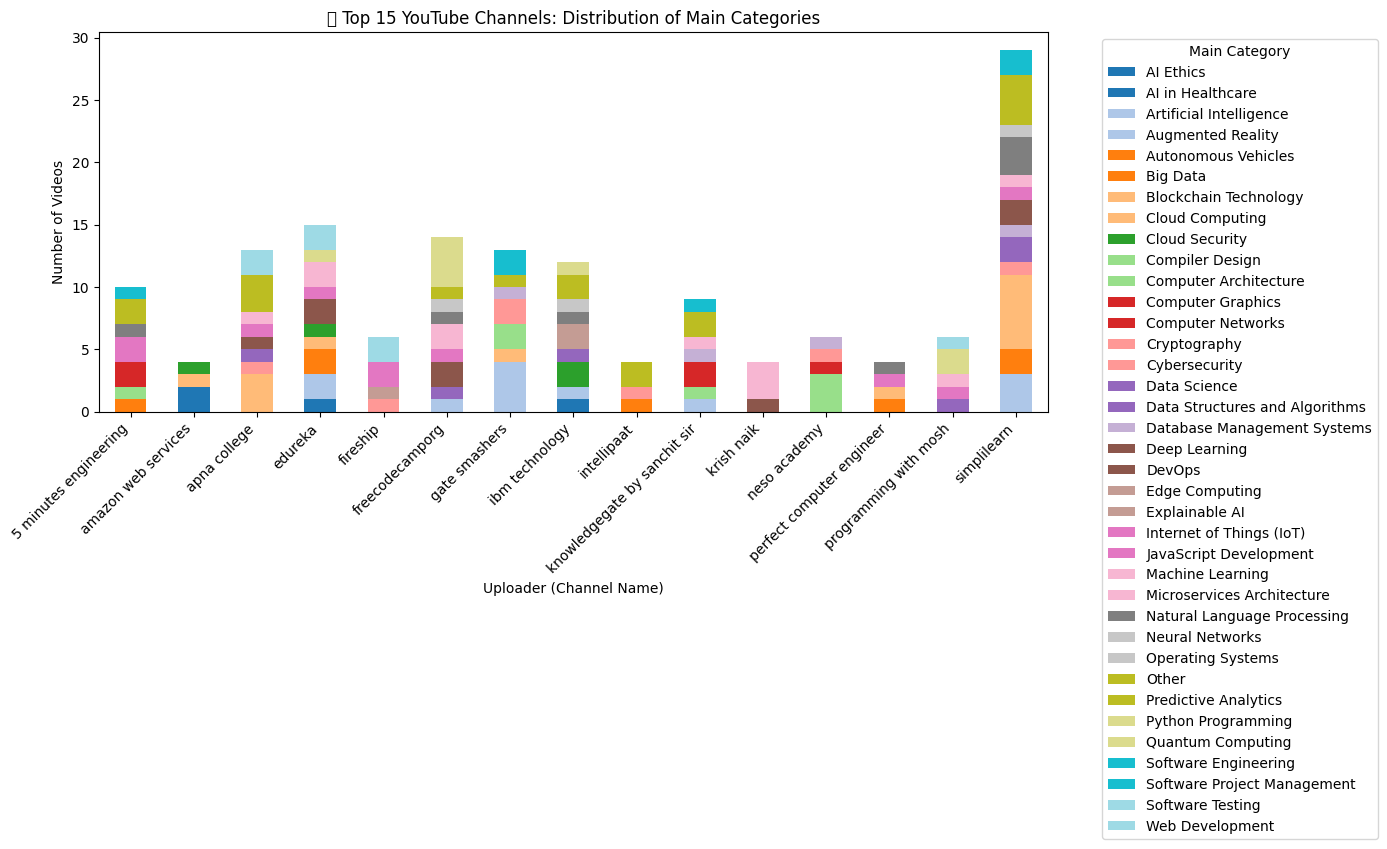

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count total videos per uploader and get top 15
top_uploaders = df['Uploader'].value_counts().head(15).index

# Step 2: Filter dataframe to include only top 15 uploaders
df_top = df[df['Uploader'].isin(top_uploaders)]

# Step 3: Group by Uploader and Main Category
category_by_channel = df_top.groupby(['Uploader', 'Main Category']).size().unstack(fill_value=0)

# Step 4: Plot stacked bar chart
category_by_channel.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title("📊 Top 15 YouTube Channels: Distribution of Main Categories")
plt.xlabel("Uploader (Channel Name)")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Main Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Model Building & Training

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [58]:
df = pd.read_csv('final_dataset.csv')
df.head(5)

,Title,Uploader,Views,Likes,Comments,Upload Date,Duration (Minutes),URL,Engagement,Days Since Upload,Views Per Day,Main Category
0,machine learning for everybody full course,freecodecamporg,8397276,83764,1800,2022-09-26,233.88,https://www.youtube.com/watch?v=i_LwzRVP7bg,0.010189,937,8961.874066,Machine Learning
1,complete machine learning in 6 hours krish naik,krish naik,1124367,19654,466,2022-05-28,397.87,https://www.youtube.com/watch?v=JxgmHe2NyeY,0.017895,1058,1062.728733,Machine Learning
2,machine learning full course learn machine le...,edureka,3336201,59006,1300,2019-09-22,578.53,https://www.youtube.com/watch?v=GwIo3gDZCVQ,0.018076,2037,1637.801178,Machine Learning
3,all machine learning algorithms explained in 1...,infinite codes,661710,29703,242,2024-09-17,16.48,https://www.youtube.com/watch?v=E0Hmnixke2g,0.045254,215,3077.720930,Machine Learning
4,complete ml machine learning in one shot seme...,knowledgegate by sanchit sir,313207,5279,598,2024-06-09,425.92,https://www.youtube.com/watch?v=2oGsCHlfBUg,0.018764,315,994.307937,Machine Learning


In [70]:
def classify_performance(row):
    if row < 1000:
        return 'Low'
    elif 1000 <= row < 5000:
        return 'Medium'
    else:
        return 'High'

# Create label column
df['Performance'] = df['Views Per Day'].apply(classify_performance)

df.to_csv("final_dataset.csv", index=False)

In [60]:
label_encoders = {}

for col in ['Uploader', 'Main Category']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [61]:
X = df[['Uploader', 'Likes', 'Comments', 'Duration (Minutes)', 'Engagement', 'Days Since Upload', 'Main Category']]
y = df['Performance']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:

              precision    recall  f1-score   support

        High       1.00      0.33      0.50         6
         Low       0.89      1.00      0.94        73
      Medium       0.70      0.47      0.56        15

    accuracy                           0.87        94
   macro avg       0.86      0.60      0.67        94
weighted avg       0.87      0.87      0.85        94



In [64]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:

              precision    recall  f1-score   support

        High       1.00      0.33      0.50         6
         Low       0.96      1.00      0.98        73
      Medium       0.75      0.80      0.77        15

    accuracy                           0.93        94
   macro avg       0.90      0.71      0.75        94
weighted avg       0.93      0.93      0.92        94



In [65]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("\nSVM Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Report:

              precision    recall  f1-score   support

        High       1.00      0.17      0.29         6
         Low       0.84      1.00      0.91        73
      Medium       0.50      0.20      0.29        15

    accuracy                           0.82        94
   macro avg       0.78      0.46      0.49        94
weighted avg       0.80      0.82      0.77        94



In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the data
df = pd.read_csv("final_dataset.csv")

# Define performance class
bins = [0, 100, 1000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Performance Class'] = pd.cut(df['Views Per Day'], bins=bins, labels=labels)

# Encode categorical columns
df_encoded = pd.get_dummies(df[['Main Category', 'Uploader']], drop_first=True)

# Combine encoded with numerical features
features = pd.concat([
    df[['Likes', 'Comments', 'Engagement', 'Duration (Minutes)', 'Days Since Upload']],
    df_encoded
], axis=1)
target = df['Performance Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models
rf_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# Fit and evaluate
models = {
    "Random Forest": rf_model,
    "Logistic Regression": log_model,
    "SVM": svm_model
}

best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_model = model
        best_model_name = name
        best_accuracy = accuracy

print(f"\nSelected Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
print(classification_report(y_test, best_model.predict(X_test)))

# Save best model
import joblib
joblib.dump(best_model, 'best_video_classifier_model.pkl')

Random Forest Accuracy: 0.8936
Logistic Regression Accuracy: 0.8830
SVM Accuracy: 0.8191

Selected Best Model: Random Forest with Accuracy: 0.8936
              precision    recall  f1-score   support

        High       1.00      0.81      0.89        21
         Low       0.91      0.91      0.91        33
      Medium       0.84      0.93      0.88        40

    accuracy                           0.89        94
   macro avg       0.92      0.88      0.89        94
weighted avg       0.90      0.89      0.89        94



c:\Users\Siddhesh\OneDrive\Desktop\YouTube_Prg\venv_name\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['best_video_classifier_model.pkl']

### Prediction calculation

In [79]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def calculate_performance_score(video_row, scaler, weights):
    scaled = scaler.transform([[video_row['Likes'], video_row['Views'], video_row['Views Per Day']]])[0]
    normalized_likes, normalized_views, normalized_vpd = scaled

    score = (weights['likes'] * normalized_likes +
             weights['views'] * normalized_views +
             weights['vpd'] * normalized_vpd) * 100
    return round(score, 2)

def recommend_videos_with_score(data, keyword, top_n=5):
    keyword = keyword.lower()

    filtered = data[data['Title'].str.lower().str.contains(keyword) | 
                    data['Main Category'].str.lower().str.contains(keyword)].copy()

    if filtered.empty:
        return "No videos found for the keyword."

    performance_order = {"High": 3, "Medium": 2, "Low": 1}
    filtered['Performance Rank'] = filtered['Predicted Performance'].map(performance_order)

    recommended = filtered.sort_values(by='Performance Rank', ascending=False).head(top_n).copy()

    scaler = MinMaxScaler()
    scaler.fit(data[['Likes', 'Views', 'Views Per Day']])

    weights = {'likes': 0.25, 'views': 0.55, 'vpd': 0.2}
    top_video = recommended.iloc[0]
    score = calculate_performance_score(top_video, scaler, weights)
    recommended.iloc[0, recommended.columns.get_loc('Title')] += f" (Performance Score: {score}%)"

    return recommended[['Title', 'Uploader', 'Views', 'Likes', 'Views Per Day', 'Duration (Minutes)', 'Main Category', 'Predicted Performance', 'URL']]
